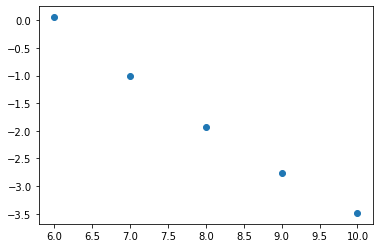

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
from scipy.optimize import curve_fit
%matplotlib inline

# define the model function
def func(z, logrho0, k):
    return logrho0 + k*(z-6.)

# create the data 
zs = np.arange(6,11)
# Mmin = 1e9
logrhoM=[ -8.30309573,  -9.40954682, -10.38931264, -11.25982223, -12.03553661]
logrhoM_err=[0.5032477729177298, 1.1968227152240374, 2.0055797374359834, 3.6225104967374016, 4.142753703249948]
# Mmin = 1e8
logrhoM=[-6.9274116,  -7.79463811, -8.57741599, -9.27963851, -9.91406071]
logrhoM_err=[0.23860035377250544, 0.7566211075847633, 2.349008631083761, 1.6058720940719162, 1.7103036117581425]
# Mmin = 1e7
logrhoM=[-5.88855271, -6.50714438, -7.10312424, -7.64329824, -8.12741176]
logrhoM_err=[0.3248416719149949, 0.3540301071450571, 0.6367161718496916, 1.3256244031603002, 1.0145532661163177]

# M1450>-26
logrhoM=[0.05919928, -1.00321148, -1.93512758, -2.75784094, -3.48947836]
logrhoM_err=[0.4048369037329699, 0.7462497028316785, 1.5816361033420558, 2.858366330805833, 3.5638611148175463]

plt.scatter(zs,logrhoM)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
from scipy.optimize import curve_fit
%matplotlib inline

# define the model function
def func(z, logrho0, k):
    return logrho0 + k*(z-6.)

# create the data 
zs = np.arange(6,11)
# Mmin = 1e9
logrhoM=import numpy as np
import matplotlib.pyplot as plt
import emcee
from scipy.optimize import curve_fit
%matplotlib inline

# define the model function
def func(z, logrho0, k):
    return logrho0 + k*(z-6.)

# create the data 
zs = np.arange(6,11)
# Mmin = 1e9
logrhoM=
logrhoM_err=
# Mmin = 1e8
logrhoM=
logrhoM_err=
# Mmin = 1e7
logrhoM=
logrhoM_err=

# M1450>-26
logrhoM=
logrhoM_err=

plt.scatter(zs,logrhoM)
plt.show()

In [77]:
def logposterior(theta):
    """
    The natural logarithm of the joint posterior.
    
    Args:
        theta (tuple): a sample containing individual parameter values
        data (list): the set of data/observations
        sigma (float): the standard deviation of the data points
        x (list): the abscissa values at which the data/model is defined
    """
    
    lp = logprior(theta) # get the prior
    
    # if the prior is not finite return a probability of zero (log probability of -inf)
    if not np.isfinite(lp):
        return -np.inf
    
    # return the likeihood times the prior (log likelihood plus the log prior)
    return lp + loglikelihood(theta)


def loglikelihood(theta): #, logrhoM_err, zs):
    # unpack the model parameters from the tuple
    logrho0, k = theta
    sigma = logrhoM_err
    md = func(zs, logrho0, k)
    # return the log likelihood
    return -0.5*np.sum(((md - logrhoM)/sigma)**2)


def logprior(theta):
    lp = 0
    # unpack the model parameters from the tuple
    logrho0, k = theta
    # set prior to 1 (log prior to 0) if in the range and zero (-inf) outside the range 
#     lp = 0. if (logrho0<-7 and k<0) else -np.inf
    return lp


nwalker = 100   # number of ensemble points

popt, pcov = curve_fit(func, zs, logrhoM, sigma=logrhoM_err)
r0, k0 = popt
print(r0,k0)
initial = np.array(popt)
ndim = len(initial)
rball = 1e-1

p0 = [initial + rball*np.random.randn(ndim) for i in range(nwalker)]

# rini = np.random.uniform(pmin, pmax, nwalker) # initial m points
# kini = np.random.uniform(pmin, pmax, nwalker) # initial c points

# inisamples = np.array([rini, kini]).T # initial samples

# ndims = inisamples.shape[1] # number of parameters/dimensions

Nburnin = 100  # number of burn-in samples
Nsamples = 10000  # number of final posterior samples

# # set additional args for the posterior (the data, the noise std. dev., and the abscissa)
# argslist = (sigma, x)



0.042639345068324834 -0.9728883852738398


In [78]:
# set up the sampler
sampler = emcee.EnsembleSampler(nwalker, ndim, logposterior)

# pass the initial samples and total number of samples required
sampler.run_mcmc(p0, Nsamples+Nburnin);

In [79]:
print(np.mean(sampler.acceptance_fraction))
tau = sampler.get_autocorr_time(tol=1)
print(tau)

0.7158663366336634
[31.94507296 31.44514985]


In [80]:
# extract the samples (removing the burn-in)
# postsamples = sampler.get_chain(discard=Nburnin, thin=np.max(tau)//2, flat=True)
Nthin = int(np.max(tau)//2)
postsamples = sampler.chain[:, Nburnin:, ::].reshape((-1, ndim))
Nthin

15

In [81]:
samples = sampler.flatchain
print('len of samples:', len(samples))
m_fit, c_fit = samples[np.argmax(sampler.flatlnprobability)]
print(np.max(sampler.flatlnprobability),m_fit,c_fit)
p_max = np.max(sampler.flatlnprobability)
# print(loglikelihood((m_fit,c_fit), sigma, x))
print(
    "Mean acceptance fraction: {0:.3f}".format(
        np.mean(sampler.acceptance_fraction))
)

len of samples: 1010000
-0.011762082172005361 0.043000042139914596 -0.9732427084993913
Mean acceptance fraction: 0.716


In [82]:
# inds = np.random.randint(len(postsamples), size=1000)
# for ind in inds:
#     sample = postsamples[ind]
#     plt.plot(zs, np.dot(np.vander(zs
#                                  , 2), sample[:2]), "C1", alpha=0.1)
# # plt.errorbar(x[:10], data1, yerr=sigma, fmt=".k", capsize=0)
# plt.errorbar(zs, data1, yerr=sigma, fmt=".k", capsize=0)
# # y_truth = flat_samples()
# plt.plot(x, straight_line(x,m_fit,c_fit), "k", label="fit")
# plt.legend(fontsize=14)
# plt.xlim(xmin, xmax)
# plt.xlabel("x")
# plt.ylabel("y");
# print(m_fit, c_fit)

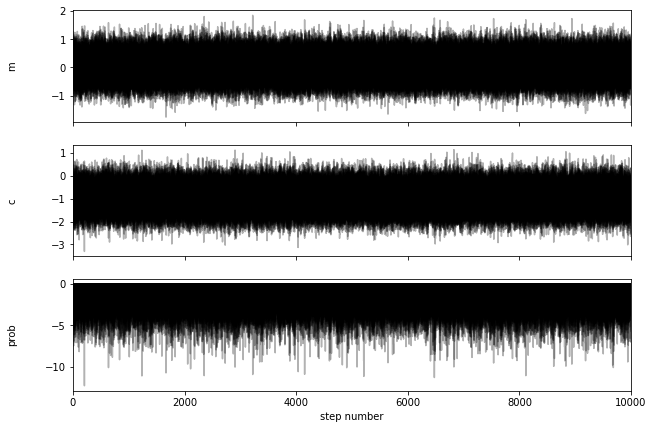

In [83]:
ndim = 2
# Nburnin = 0
fig, axes = plt.subplots(ndim+1, figsize=(10, 7), sharex=True)
samples = sampler.get_chain(discard=Nburnin)
probs = sampler.get_log_prob(discard=Nburnin)
labels = ['m', 'c', 'prob']
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
i += 1
ax = axes[i]
ax.plot(probs[:, :], "k", alpha=0.3)
ax.set_xlim(0, len(samples))
ax.set_ylabel(labels[i])
ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number")
plt.show()
# plt.savefig('_chain.png')

Number of posterior samples is 1000000
66000 66000


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


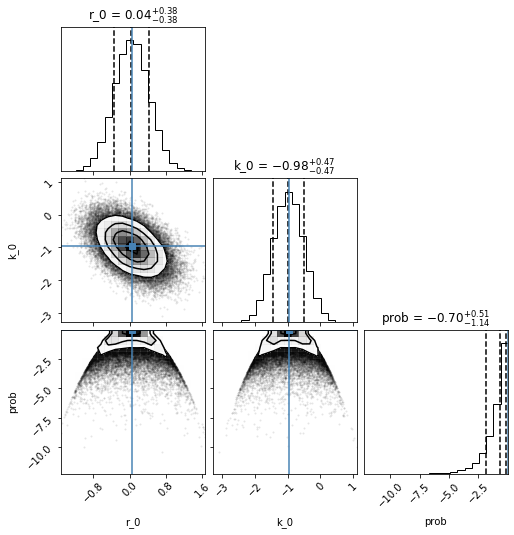

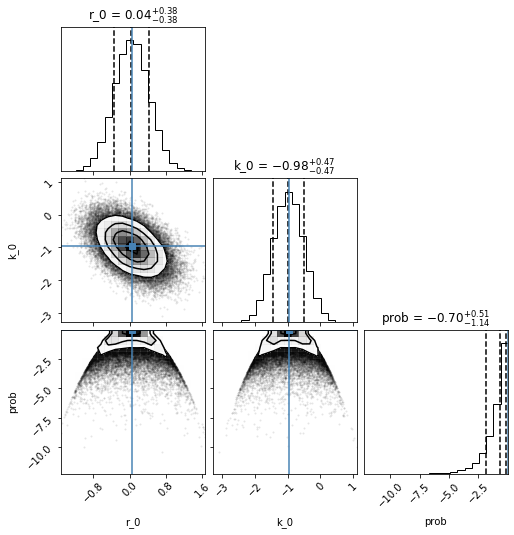

In [84]:
import corner
print('Number of posterior samples is {}'.format(postsamples.shape[0]))
labels = ['r_0','k_0','prob']

samples = sampler.get_chain(discard=2*Nburnin, thin=Nthin, flat=True)
log_prob_samples = sampler.get_log_prob(discard=2*Nburnin, thin=Nthin, flat=True)

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)
print(len(samples),len(all_samples))
# fig = corner.corner(postsamples, labels=[r"$m$", r"$c$"], truths=[m, c])
fig = corner.corner(all_samples,show_titles=True,labels=labels,truths=[r0, k0,p_max],plot_datapoints=True,quantiles=[0.16, 0.5, 0.84])
fig = corner.corner(all_samples,show_titles=True,labels=labels,truths=[m_fit, c_fit,p_max],plot_datapoints=True,quantiles=[0.16, 0.5, 0.84])

fig.show()
# fig.savefig('emcee.png')


In [85]:
from IPython.display import display, Math
for i in range(ndim):
    mcmc = np.percentile(postsamples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.2f}_{{-{1:.2f}}}^{{{2:.2f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))
# print('truth r0=%.2f'%r0+'\tk0=%.2f'%k0)

<IPython.core.display.Math object>

<IPython.core.display.Math object>